In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum


spark = SparkSession.builder.appName("SalaryAnalysis").getOrCreate()


23/12/28 22:47:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


### cek missing values (train_salaries.csv)

In [94]:

spark = SparkSession.builder.appName("CheckMissingValues").getOrCreate()

data = spark.read.csv("Salary/train_salaries.csv", header=True, inferSchema=True)

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
missing_values = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
print("Jumlah nilai yang hilang untuk setiap kolom:")
missing_values.show(truncate=False)


23/12/28 22:47:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Jumlah nilai yang hilang untuk setiap kolom:
+-----+------+
|jobId|salary|
+-----+------+
|0    |0     |
+-----+------+



### cek missing values (train_dataset_salaries.csv)

In [95]:
spark = SparkSession.builder.appName("CheckMissingValues").getOrCreate()

data = spark.read.csv("train_dataset_salaries.csv", header=True, inferSchema=True)

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
missing_values = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
print("Jumlah nilai yang hilang untuk setiap kolom:")
missing_values.show(truncate=False)

Jumlah nilai yang hilang untuk setiap kolom:
+-----+---------+-------+------+-----+--------+---------------+-------------------+------+
|jobId|companyId|jobType|degree|major|industry|yearsExperience|milesFromMetropolis|salary|
+-----+---------+-------+------+-----+--------+---------------+-------------------+------+
|0    |0        |0      |0     |0    |0       |0              |0                  |0     |
+-----+---------+-------+------+-----+--------+---------------+-------------------+------+



### Menghapus satu kolom pada dataset 

In [96]:
df = pd.read_csv("Salary/train_salaries.csv")
column_to_remove = 'jobId'
df = df.drop(column_to_remove, axis=1)

# Menyimpan DataFrame Baru yang telah di hapus
df.to_csv("train_salaries_1kolom.csv", index=False)


### Menggabungkan train_dataset dengan train_salaries yang sudah dihapus kolomnya

In [97]:
data1 = pd.read_csv('Salary/train_dataset.csv')
data2 = pd.read_csv('train_salaries_1kolom.csv')
frames = [data1, data2]
result = pd.concat(frames, axis=1).drop_duplicates().reset_index(drop=True)

# menyimpan dan membuat nama dataframe baru yang telah di gabungkan 
result.to_csv(r'train_dataset_salaries.csv', index=False)


## Jawaban soal

### 1. apa pekerjaan yang memiliki gaji tertingi

In [98]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("JobSalaryAnalysis").getOrCreate()

# Membaca data CSV
data = spark.read.csv("Salary/train_salaries.csv", header=True, inferSchema=True)

# Pekerjaan yg memiliki gaji tertinggi berdasarkan jobId
max_salary_job = data.orderBy(desc("salary")).first()
print('\n')
print("1. Pekerjaan dengan gaji tertinggi:", max_salary_job["jobId"])


23/12/28 22:48:00 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.




1. Pekerjaan dengan gaji tertinggi: JOB1362685093249


### 2. Apa 20 Pekerjaan Teratas Berdasarkan Gaji Tertinggi

2. 20 Pekerjaan teratas berdasarkan gaji tertinggi:

+----------------+------+
|           jobId|salary|
+----------------+------+
|JOB1362685093249|   301|
|JOB1362684808298|   301|
|JOB1362684980464|   298|
|JOB1362684700908|   294|
|JOB1362685319434|   294|
|JOB1362684911649|   293|
|JOB1362685313400|   293|
|JOB1362684454890|   292|
|JOB1362685292589|   292|
|JOB1362684784883|   290|
|JOB1362684819568|   289|
|JOB1362685334476|   289|
|JOB1362684877944|   289|
|JOB1362684465958|   288|
|JOB1362685123408|   288|
|JOB1362685252931|   287|
|JOB1362685040736|   287|
|JOB1362684471187|   286|
|JOB1362684672069|   286|
|JOB1362684947259|   286|
+----------------+------+



/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_23351/2128717645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="salary", y="jobId", data=result_jobs, palette="viridis")


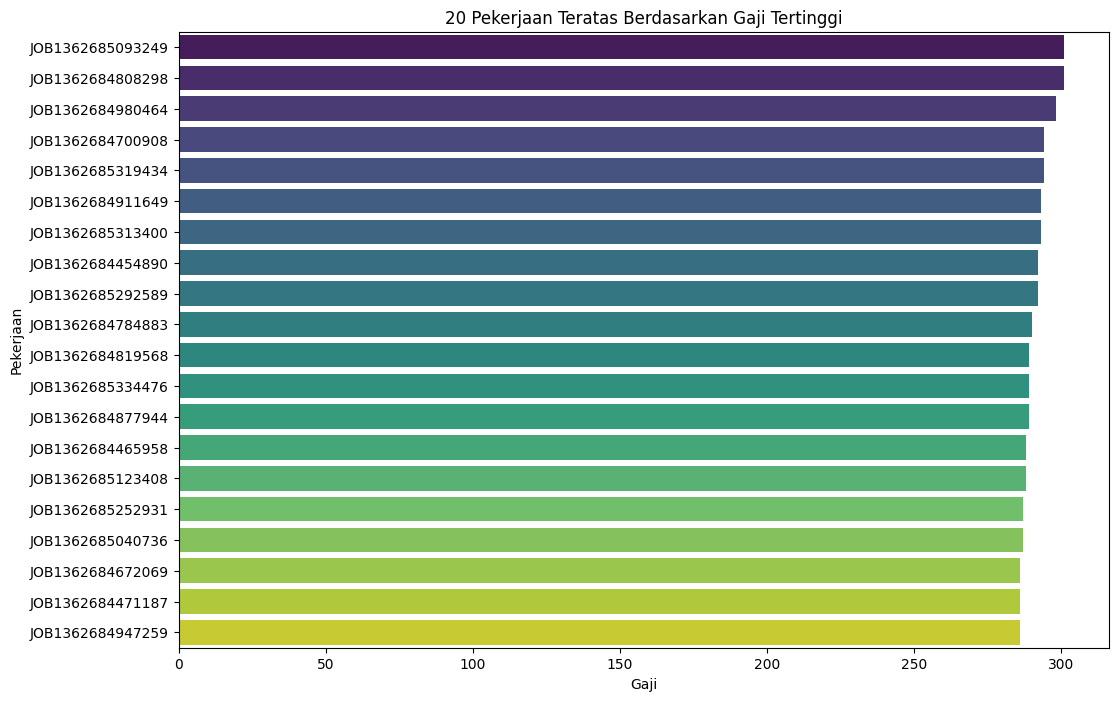

In [99]:
pekerjaan = data.orderBy(desc("salary")).limit(20)
print("2. 20 Pekerjaan teratas berdasarkan gaji tertinggi:\n")
pekerjaan.show()

result_jobs = pekerjaan.toPandas()
plt.figure(figsize=(12, 8))
sns.barplot(x="salary", y="jobId", data=result_jobs, palette="viridis")
plt.title('20 Pekerjaan Teratas Berdasarkan Gaji Tertinggi')
plt.xlabel('Gaji')
plt.ylabel('Pekerjaan')
plt.show()

### 3. Apa pekerjaan yang memiliki gaji terendah

In [100]:
gaji_rendah = data.orderBy("salary").first()
print("3. Pekerjaan dengan gaji terendah:", gaji_rendah["jobId"])

3. Pekerjaan dengan gaji terendah: JOB1362684438246


### 4. Apa 3 industri teratas berdasarkan Gaji Tertinggi

3 Industri Teratas Berdasarkan Gaji Tertinggi:
+--------+------------------+
|industry|       avg(salary)|
+--------+------------------+
|     OIL| 130.9529456262126|
| FINANCE|130.74674347470025|
|     WEB|121.64451210144826|
+--------+------------------+



/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_23351/4066161778.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg(salary)", y="industry", data=result_industry, palette="viridis")


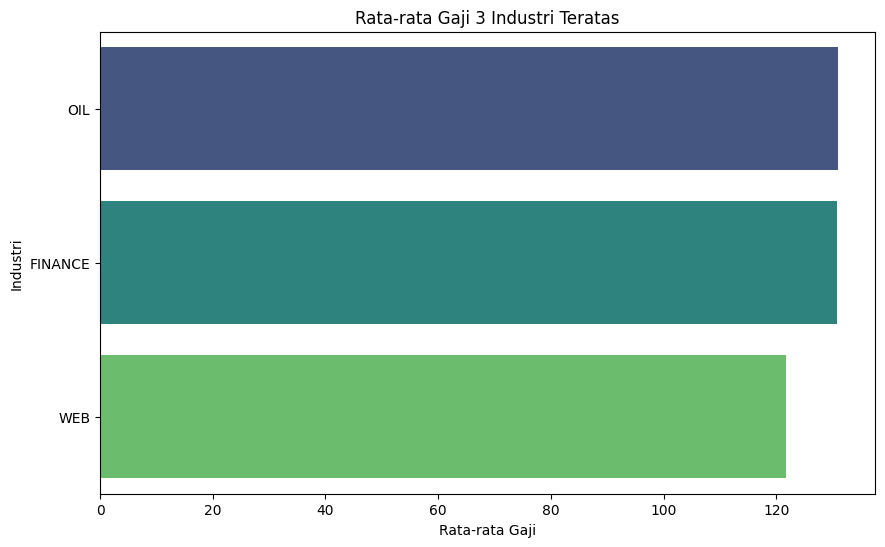

In [101]:
# Impor data dari file CSV
df = spark.read.csv("train_dataset_salaries.csv", header=True, inferSchema=True)

industry_salary = df.select("industry", "salary").groupBy("industry").avg("salary").orderBy("avg(salary)", ascending=False).limit(3)

print("3 Industri Teratas Berdasarkan Gaji Tertinggi:")
industry_salary.show()

# Visualisasi menggunakan bar plot
result_industry = industry_salary.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x="avg(salary)", y="industry", data=result_industry, palette="viridis")
plt.title('Rata-rata Gaji 3 Industri Teratas')
plt.xlabel('Rata-rata Gaji')
plt.ylabel('Industri')
plt.show()



### 5. Apakah pekerja dengan labih banyak tahun pengalaman mendapatkan gaji lebih tinggi

Ya, mengalamai kenaikan gaji seiring bertambahnya pengalaman kerja
+---------------+------------------+
|yearsExperience|       avg(salary)|
+---------------+------------------+
|             12|116.34238731091799|
|             22|136.35078507975217|
|              1| 93.96003973674406|
|             13|117.89983930095917|
|             16|124.14952474105284|
|              6|103.92168599576007|
|              3| 98.09036849045806|
|             20|132.09137741322397|
|              5|101.68115362507186|
|             19|130.00883090817862|
|             15|121.90384997023219|
|              9|110.10637504660122|
|             17| 126.1513026552206|
|              4|100.01411229893097|
|              8|107.83860112667631|
|             23|138.43901037111084|
|              7|106.04502209903363|
|             10|112.16709132693845|
|             24| 140.1311088810838|
|             21|134.00241454764958|
+---------------+------------------+
only showing top 20 rows



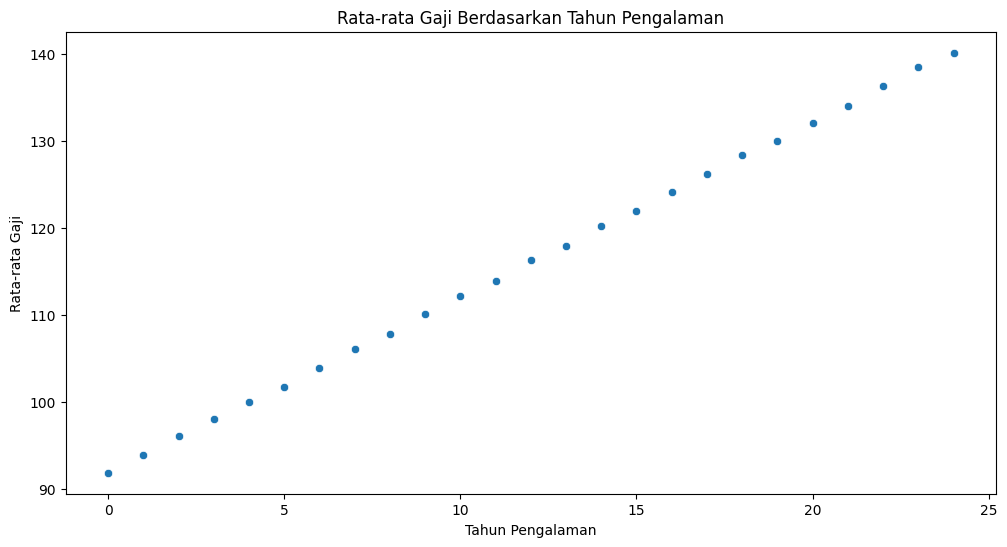

In [102]:
print('Ya, mengalamai kenaikan gaji seiring bertambahnya pengalaman kerja')

df.select("yearsExperience", "salary").groupBy("yearsExperience").avg("salary").show()

# Menampilkan rata-rata gaji berdasarkan tahun pengalaman
result = df.select("yearsExperience", "salary").groupBy("yearsExperience").avg("salary").toPandas()

# Visualisasi menggunakan scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="yearsExperience", y="avg(salary)", data=result)
plt.title('Rata-rata Gaji Berdasarkan Tahun Pengalaman')
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Rata-rata Gaji')
plt.show()


### 6. Apakah pekerja dengan gelar lebih tinggi memiliki pekerjaan yang lebih baik dibayar

Ya, tingkat pendidikan mempengaruhi gaji


/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_23351/473955670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg(salary)", y="degree", data=result_degree, palette="viridis")


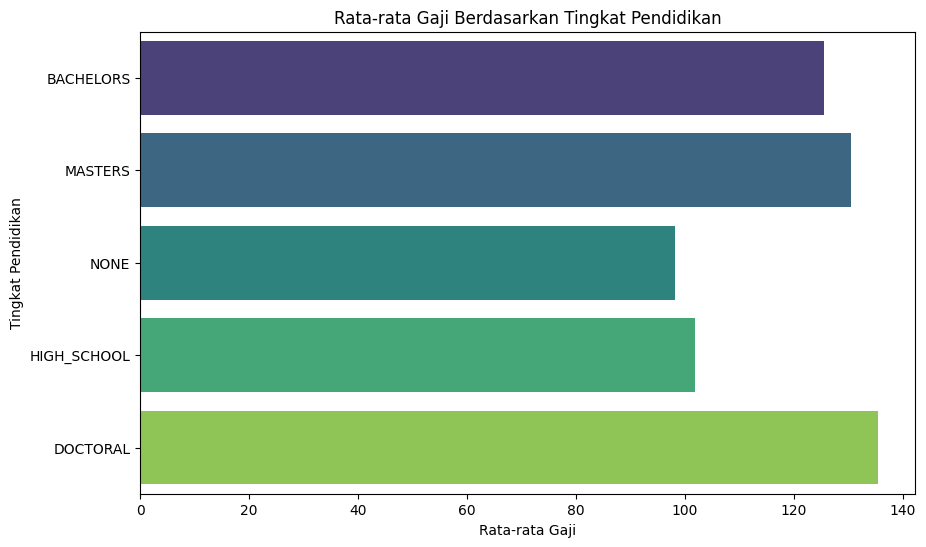

In [103]:
print('Ya, tingkat pendidikan mempengaruhi gaji')

result_degree = df.select("degree", "salary").groupBy("degree").avg("salary").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="avg(salary)", y="degree", data=result_degree, palette="viridis")
plt.title('Rata-rata Gaji Berdasarkan Tingkat Pendidikan')
plt.xlabel('Rata-rata Gaji')
plt.ylabel('Tingkat Pendidikan')
plt.show()